# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pickle as pk
import warnings
warnings.filterwarnings('ignore')

# Data Collection and Analysis

Dataset : [insurance data](https://www.kaggle.com/mirichoi0218/insurance)

In [2]:
#Loading the dataset into Pandas Dataframe
insurance_data = pd.read_csv('/content/insurance.csv')

In [3]:
#Printing top five rows of the data
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Getting informations about data
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Categorical features
1. Sex
2. smoker
3. region

In [5]:
#Checking for missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#Statistical measures of the data
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


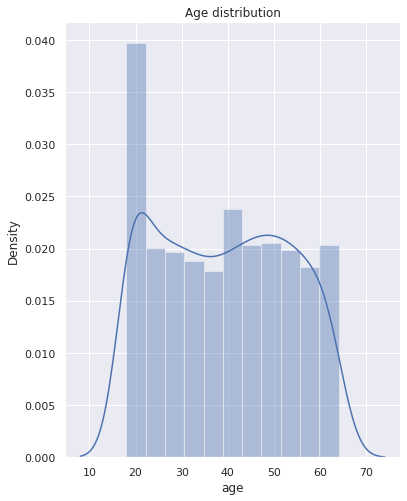

In [7]:
#Distribution of Age values
sns.set() #For getting beautiful themes
plot = plt.figure(figsize=(6,8))
sns.distplot(insurance_data['age'])
plt.title("Age distribution")
plt.show()

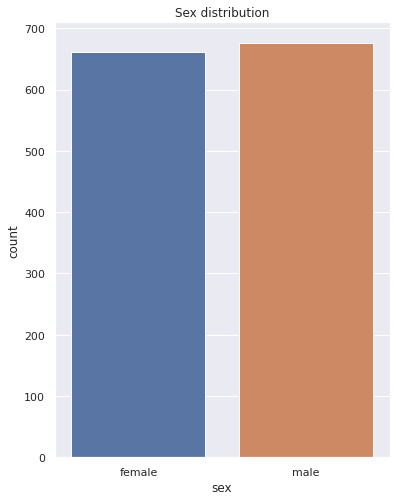

In [8]:
#Gender column
plot = plt.figure(figsize=(6,8))
sns.countplot(insurance_data['sex'])
plt.title("Sex distribution")
plt.show()

In [9]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

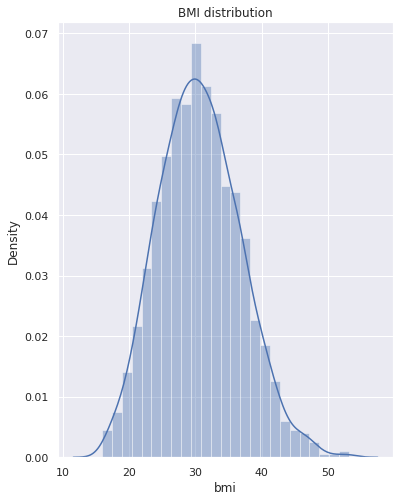

In [10]:
#bmi Distributions
plot = plt.figure(figsize=(6,8))
sns.distplot(insurance_data['bmi'])
plt.title("BMI distribution")
plt.show()

Normal BMI in range -->  18.5-24.9

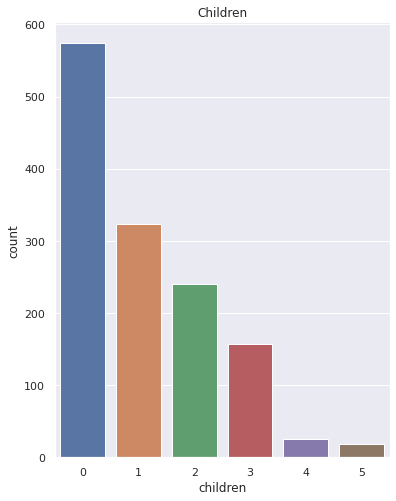

In [11]:
#Children column
plot = plt.figure(figsize=(6,8))
sns.countplot(insurance_data['children'])
plt.title("Children")
plt.show()

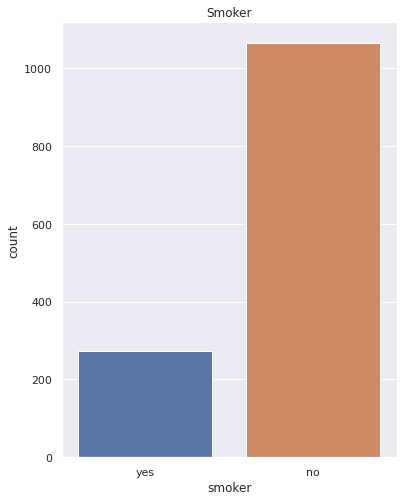

In [12]:
#Smoker column
plot = plt.figure(figsize=(6,8))
sns.countplot(insurance_data['smoker'])
plt.title("Smoker")
plt.show()

In [13]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

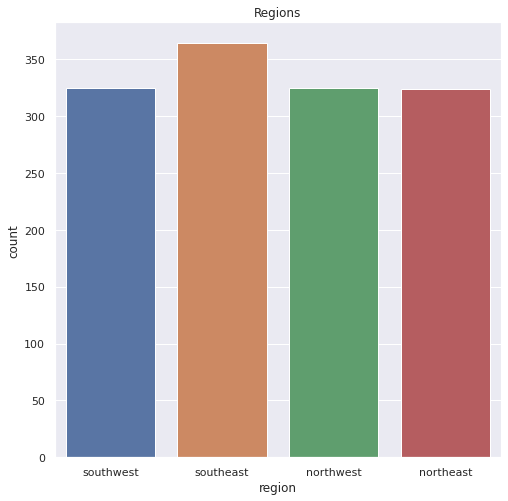

In [14]:
#Region columns
plot = plt.figure(figsize=(8,8))
sns.countplot(insurance_data['region'])
plt.title("Regions")
plt.show()

In [15]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

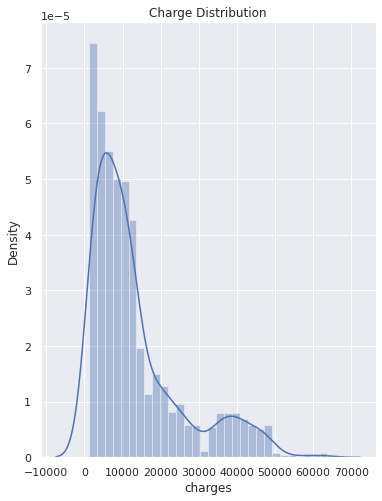

In [16]:
#Charge distributions
plot = plt.figure(figsize=(6,8))
sns.distplot(insurance_data['charges'])
plt.title("Charge Distribution")
plt.show()

## Data Preprocessing

Encoding categorical features

In [17]:
categorical_features = insurance_data.select_dtypes('object').columns
for feature in categorical_features:
  print(feature)
  print(insurance_data[feature].unique())

sex
['female' 'male']
smoker
['yes' 'no']
region
['southwest' 'southeast' 'northwest' 'northeast']


In [18]:
#Sex column
insurance_data['sex'].replace({'female':1, 'male':0},inplace=True)
insurance_data['smoker'].replace({'yes':1 ,'no':0},inplace=True )
insurance_data['region'].replace({'southeast':0,'southwest':1,'northeast':2,'northwest':3}, inplace=True)


In [19]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


# Split Features and Target

In [20]:
X = insurance_data.drop(columns='charges',axis=1)
y = insurance_data['charges']

In [21]:
print(X)
print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Train Test Split

In [22]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [23]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training

In [24]:
#Loading LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
# Using cross_val_score for gaining average R squared value
scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring='r2')
print('Average R squared value : {:.2f}'.format(sum(scores)/len(scores)))

Average R squared value : 0.74


In [26]:
#Prediction on training data
train_data_prediction = model.predict(X_train)

#R squared value
r2_train = metrics.r2_score(y_train, train_data_prediction)

print("R squared value on Train data :{:.2f}".format(r2_train))

R squared value on Train data :0.75


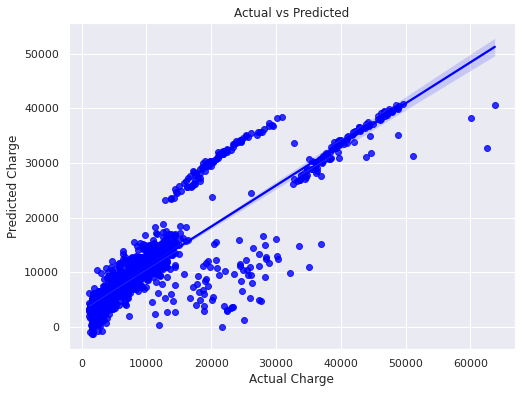

In [27]:
plot = plt.figure(figsize=(8,6))
sns.regplot(x=y_train, y=train_data_prediction,color='blue')
plt.xlabel('Actual Charge')
plt.ylabel('Predicted Charge')
plt.title("Actual vs Predicted")
plt.show()

In [28]:
#Prediction on test data
test_data_prediction = model.predict(X_test)

#R squared value
r2_test = metrics.r2_score(y_test, test_data_prediction)

print("R squared value on Test data : {:.2f}".format(r2_test))

R squared value on Test data : 0.74


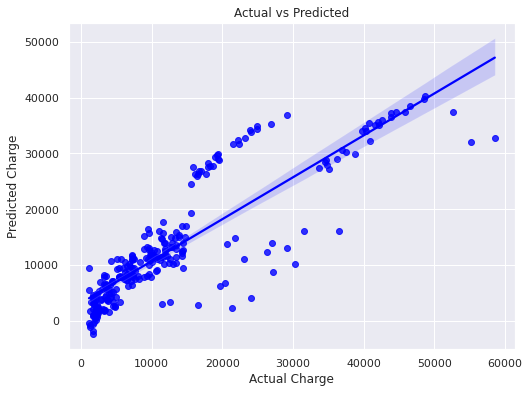

In [29]:
plot = plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=test_data_prediction,color='blue')
plt.xlabel('Actual Charge')
plt.ylabel('Predicted Charge')
plt.title("Actual vs Predicted")
plt.show()

# Building Predictive System

In [30]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [31]:
#Creating function for prediction
def insurance_prediction(age, sex, bmi, children, smoker, region):
  age = int(age)
  sex = int(sex)
  bmi = float(bmi)
  children = int(children)
  smoker = int(smoker)
  region = int(region)
  X = [[age, sex, bmi, children, smoker, region]]
  return model.predict(X)

In [32]:
prediction = insurance_prediction(31,1,25.74,0, 1, 1)[0]
if prediction:
  print("The insurance cost is USD ",prediction)

The insurance cost is USD  27900.40471439059


## Saving Trained Model

In [33]:
#Saving model as pickle file
filename = "medical_insurance_prediction_model.pkl"
pk.dump(model, open(filename, "wb"))

In [34]:
#Loading pickle file
regressor = pk.load(open(filename,"rb"))

In [35]:
def insurance_prediction(age, sex, bmi, children, smoker, region):
  age = int(age)
  sex = int(sex)
  bmi = float(bmi)
  children = int(children)
  smoker = int(smoker)
  region = int(region)
  X = [[age, sex, bmi, children, smoker, region]]
  return regressor.predict(X)

In [36]:
prediction = insurance_prediction(31,1,25.74,0, 1, 1)[0]
if prediction:
  print("The insurance cost is USD ",prediction)

The insurance cost is USD  27900.40471439059
